<a href="https://colab.research.google.com/github/NanTum/GeosDataSci/blob/master/Clustering_fire_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering fire data

นายนันทพงศ์   ตันตระกูล   6270381021

## เพิ่มข้อมูล

In [1]:
import pandas as pd
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [3]:
firedata=pd.read_excel('https://github.com/NanTum/GeosDataSci/raw/master/Fire_Data.15240.1598195125.4438.xlsx')

In [4]:
firedata

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.4,5.8,0
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.3,6.4,0
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,305.0,3.8,0
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.0,4.6,0
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.9,3.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79229,79230,17.81812,97.74127,347.4,0.78,0.78,2020-04-04,2003,N,VIIRS,n,1,294.4,7.2,0
79230,79231,17.77545,97.85637,306.5,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.9,0
79231,79232,17.76847,97.79116,305.7,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.2,0
79232,79233,17.77518,97.82606,306.1,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,292.7,2.9,0


### จัดการข้อมูล

In [5]:
firedata.ACQ_TIME= firedata.ACQ_TIME.astype(str)
firedata.ACQ_DATE= firedata.ACQ_DATE.astype(str)
df = pd.DataFrame({'year': firedata.ACQ_DATE.str[0:4],
                   'month': firedata.ACQ_DATE.str[5:7],
                   'day': firedata.ACQ_DATE.str[8:10],
                   'hour': firedata.ACQ_TIME.str[:-2],
                   'minute': firedata.ACQ_TIME.str[-2:]})
firedata['DateTime']=pd.to_datetime(df)
firedata = firedata[['LATITUDE','LONGITUDE','DateTime']]

In [6]:
firedata

,LATITUDE,LONGITUDE,DateTime
0,16.33696,98.70137,2019-12-01 06:35:00
1,16.48906,98.73961,2019-12-01 06:35:00
2,16.93571,99.06874,2019-12-01 06:35:00
3,16.54092,98.59869,2019-12-01 06:35:00
4,16.87473,98.63222,2019-12-01 06:35:00
...,...,...,...
79229,17.81812,97.74127,2020-04-04 20:03:00
79230,17.77545,97.85637,2020-04-04 20:03:00
79231,17.76847,97.79116,2020-04-04 20:03:00
79232,17.77518,97.82606,2020-04-04 20:03:00


In [8]:
firedata['DateTime'] = pd.to_numeric(firedata.DateTime)
r_dt = max(firedata.DateTime)-min(firedata.DateTime)
r_lat = max(firedata.LATITUDE)-min(firedata.LATITUDE)
r_lon = max(firedata.LONGITUDE)-min(firedata.LONGITUDE)
firedata['DateTime'] = (firedata.DateTime-min(firedata.DateTime))*max(r_lat,r_lon)/r_dt

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [9]:
firedata

,LATITUDE,LONGITUDE,DateTime
0,16.33696,98.70137,0.00000
1,16.48906,98.73961,0.00000
2,16.93571,99.06874,0.00000
3,16.54092,98.59869,0.00000
4,16.87473,98.63222,0.00000
...,...,...,...
79229,17.81812,97.74127,5.24745
79230,17.77545,97.85637,5.24745
79231,17.76847,97.79116,5.24745
79232,17.77518,97.82606,5.24745


## แบ่งข้อมูลโดยใช้ K-Means Clustering

In [53]:
points=firedata

### ทดสอบห่าค่า K ที่เหมาะสม 

In [68]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
ans=[]
for i in range(19):
    n_clusters=i+2
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(points)
    cluster_labels = kmeans.labels_
    x=silhouette_avg = silhouette_score(points, cluster_labels)
    ans.append(x)

คำนวณ silhoulette score ของค่า K จาก 2 ถึง 20 เพื่อหาจำนวณกลุ่มที่เหมาะสม

In [69]:
ans

[0.36752376598091135,
 0.33953812252822035,
 0.3397497852900635,
 0.33625625622978095,
 0.3161728119888272,
 0.32169001388381935,
 0.3347828175976702,
 0.3216744472559159,
 0.3147706801936224,
 0.3228586049252143,
 0.3264516122994236,
 0.3284767784080949,
 0.3185818650276997,
 0.31442981987299956,
 0.3173945875790051,
 0.3169427562974456,
 0.3106187547784365,
 0.3046939455309382,
 0.30721135563960333]

จะเห็นว่าค่า K ที่เหมาะสมที่สุดสำหรับวิธีนี้คือ 2

### แบ่งกลุ่ม คำนวณค่า silhoulette score และพลอตกราฟแสดง silhouette coefficient

In [70]:
from sklearn.cluster import KMeans
n_clusters=2
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(points)
cluster_labels = kmeans.labels_
SS = kmeans.inertia_ #Sum of squared distances of samples to their closest cluster center.

In [71]:
SS

164573.32918945202

In [72]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(points, cluster_labels)

In [73]:
silhouette_avg

0.3674663380531219

In [74]:
sample_silhouette_values = silhouette_samples(points, cluster_labels)

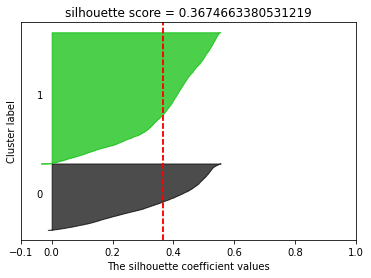

In [75]:
import matplotlib.cm as cm
fig, ax = plt.subplots()
y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
          0, ith_cluster_silhouette_values,
          facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("silhouette score = " + str(silhouette_avg))
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

## Plot ข้อมูลที่แบ่งกลุ่มแล้ว

In [77]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

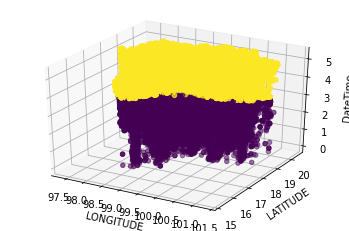

In [78]:
# Axes3D.plot3D(firedata.LONGITUDE,firedata.LATITUDE,firedata.DateTime)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x=firedata.LONGITUDE
y=firedata.LATITUDE
z=firedata.DateTime
# ax.scatter(x, y, z)
ax.scatter(x,y,z, c=cluster_labels)

ax.set_xlabel('LONGITUDE')
ax.set_ylabel('LATITUDE')
ax.set_zlabel('DateTime')

plt.show()